In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from sklearn.model_selection import train_test_split


random.seed(123) 
np.random.seed(123) 

### Wczytanie danych i wstępna analiza

In [2]:
df = pd.read_csv("merged_dataset.csv")

In [3]:
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Is.Fraudulent,Account.Age.Days,Transaction.Hour,source,browser,sex,Payment.Method,Product.Category,Quantity,Device.Used,Address.Match
0,2024-02-12 10:05:21,145.98,29,0,172,10,Ads,IE,F,credit card,home & garden,3,mobile,1
1,2024-01-25 22:24:06,677.62,40,0,250,22,Direct,FireFox,M,credit card,clothing,3,desktop,1
2,2024-03-26 20:32:44,798.63,40,0,118,20,Ads,Chrome,M,PayPal,clothing,3,mobile,1
3,2024-01-07 23:14:51,314.65,34,0,187,23,SEO,IE,M,bank transfer,toys & games,3,desktop,1
4,2024-01-19 11:01:19,119.80,11,1,5,11,Direct,Safari,M,PayPal,toys & games,3,tablet,1


In [4]:
df.describe()

,Transaction.Amount,Customer.Age,Is.Fraudulent,Account.Age.Days,Transaction.Hour,Quantity,Address.Match
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,132.159940,33.832817,0.072010,117.827270,11.416570,3.003837,0.899063
std,213.742793,9.385130,0.258505,100.649353,6.948137,1.415581,0.301245
min,9.000000,-10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,27.000000,0.000000,40.000000,5.000000,2.000000,1.000000
50%,53.000000,33.000000,0.000000,87.000000,11.000000,3.000000,1.000000
75%,152.672500,40.000000,0.000000,178.000000,17.000000,4.000000,1.000000
max,8329.900000,86.000000,1.000000,365.000000,23.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction.Date    300000 non-null  object 
 1   Transaction.Amount  300000 non-null  float64
 2   Customer.Age        300000 non-null  int64  
 3   Is.Fraudulent       300000 non-null  int64  
 4   Account.Age.Days    300000 non-null  int64  
 5   Transaction.Hour    300000 non-null  int64  
 6   source              300000 non-null  object 
 7   browser             300000 non-null  object 
 8   sex                 300000 non-null  object 
 9   Payment.Method      300000 non-null  object 
 10  Product.Category    300000 non-null  object 
 11  Quantity            300000 non-null  int64  
 12  Device.Used         300000 non-null  object 
 13  Address.Match       300000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 32.0+ MB


### Brak wartości NULL

In [ ]:
df.isnull().sum()

Transaction.Date      0
Transaction.Amount    0
Customer.Age          0
Is.Fraudulent         0
Account.Age.Days      0
Transaction.Hour      0
source                0
browser               0
sex                   0
Payment.Method        0
Product.Category      0
Quantity              0
Device.Used           0
Address.Match         0
dtype: int64

array([[<Axes: title={'center': 'Transaction.Amount'}>,
        <Axes: title={'center': 'Customer.Age'}>,
        <Axes: title={'center': 'Is.Fraudulent'}>],
       [<Axes: title={'center': 'Account.Age.Days'}>,
        <Axes: title={'center': 'Transaction.Hour'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Address.Match'}>, <Axes: >, <Axes: >]],
      dtype=object)

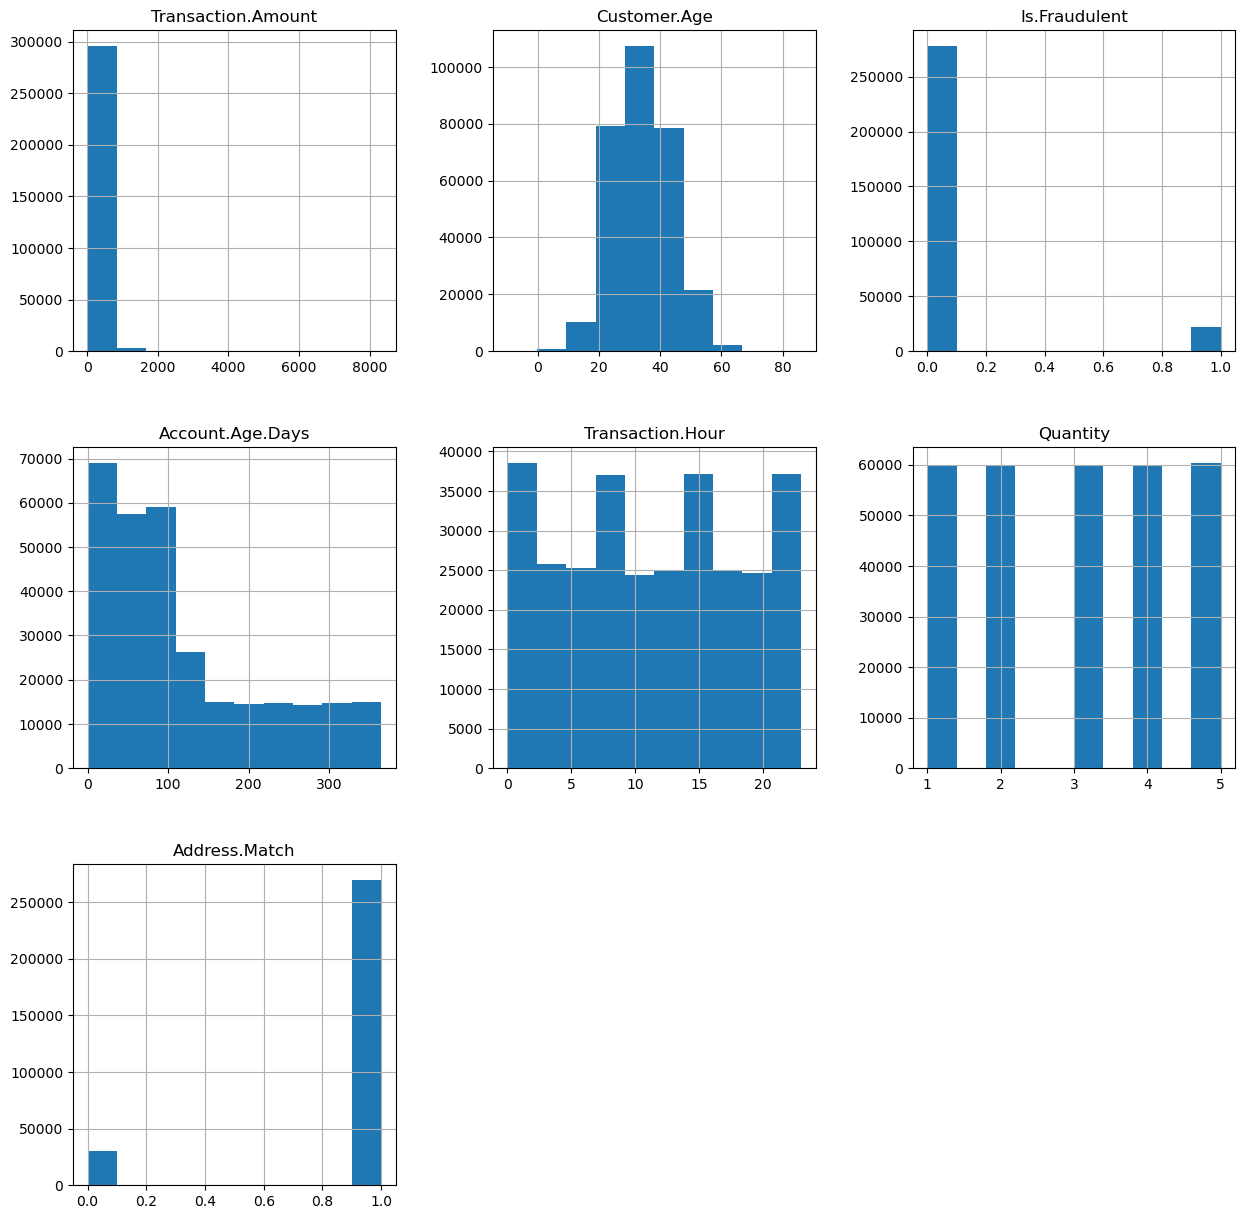

In [7]:
df.hist(figsize=(15,15))

In [3]:
NUMERIC=["Transaction.Amount",'Customer.Age','Account.Age.Days','Quantity']
CATEGORICAL = [x for x in df.columns if x not in NUMERIC]

#### CATEGORICAL

In [9]:
CATEGORICAL

['Transaction.Date',
 'Is.Fraudulent',
 'Transaction.Hour',
 'source',
 'browser',
 'sex',
 'Payment.Method',
 'Product.Category',
 'Device.Used',
 'Address.Match']

<Axes: xlabel='Device.Used', ylabel='Count'>

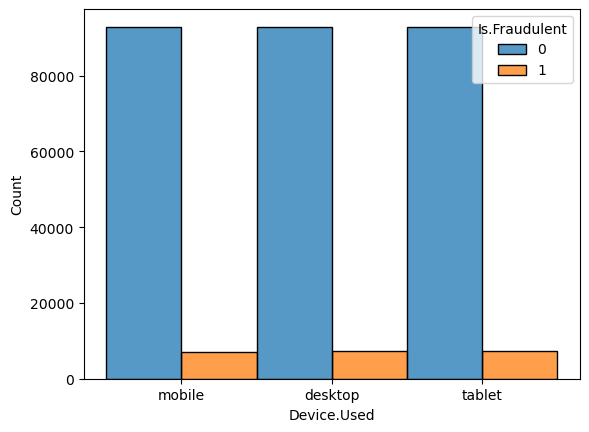

In [10]:
sns.histplot(data=df, x="Device.Used", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

<Axes: xlabel='Payment.Method', ylabel='Count'>

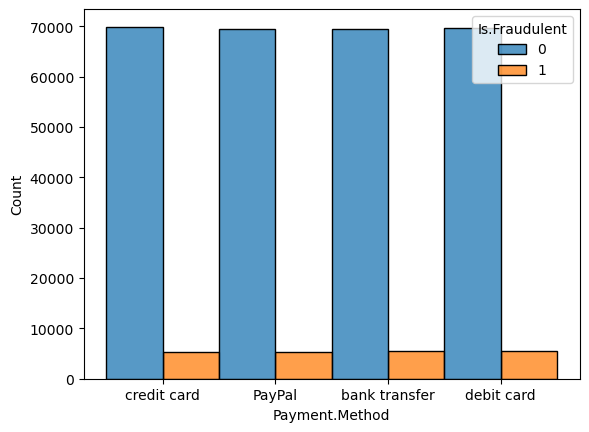

In [11]:
sns.histplot(data=df, x="Payment.Method", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

<Axes: xlabel='browser', ylabel='Count'>

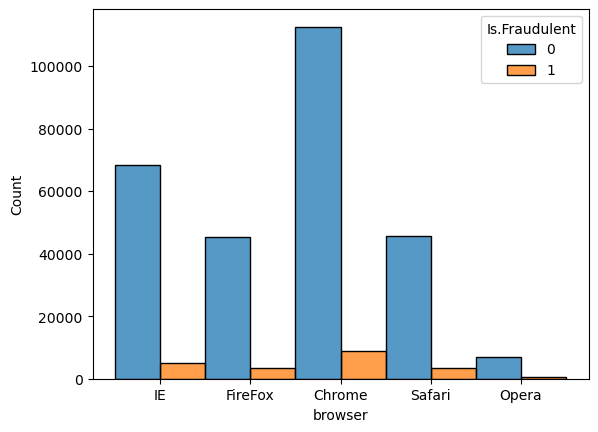

In [12]:
sns.histplot(data=df, x="browser", hue="Is.Fraudulent", multiple="dodge") # might be because chrome most popular?

<Axes: xlabel='Transaction.Hour', ylabel='Count'>

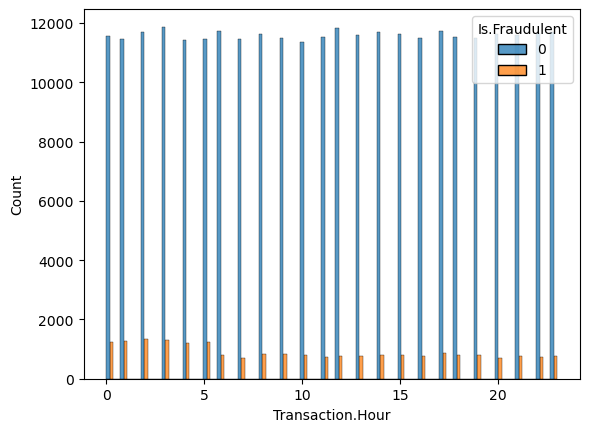

In [13]:
sns.histplot(data=df, x="Transaction.Hour", hue="Is.Fraudulent", multiple="dodge") # hour seems to matter

<Axes: xlabel='source', ylabel='Count'>

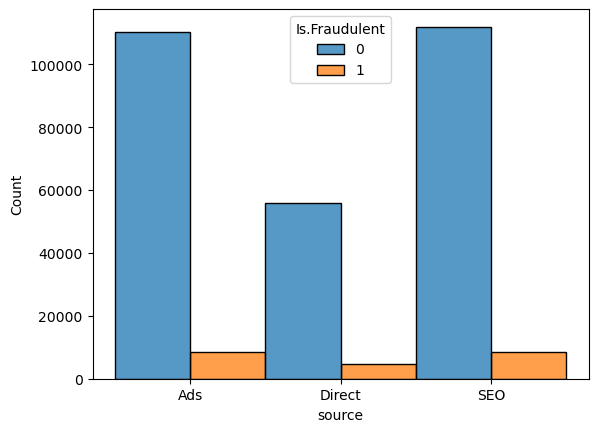

In [14]:
sns.histplot(data=df, x="source", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

<Axes: xlabel='sex', ylabel='Count'>

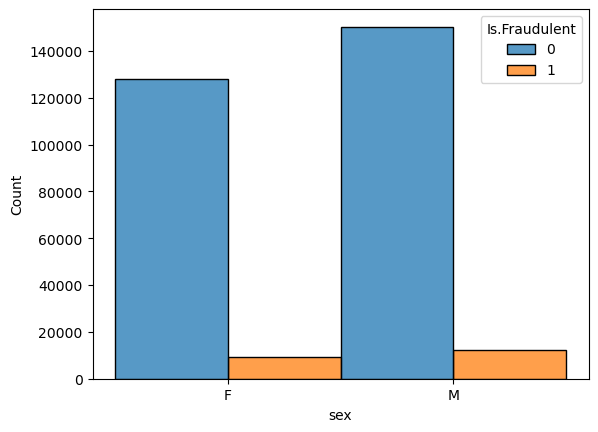

In [15]:
sns.histplot(data=df, x='sex', hue='Is.Fraudulent', multiple='dodge')

<Axes: xlabel='Product.Category', ylabel='Count'>

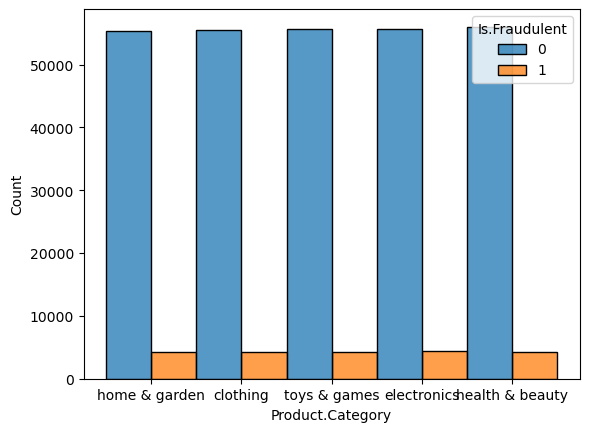

In [16]:
sns.histplot(data=df, x="Product.Category", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

### NUMERIC

Brak korelacji pomiędzy zmiennymi numerycznymi

<Axes: >

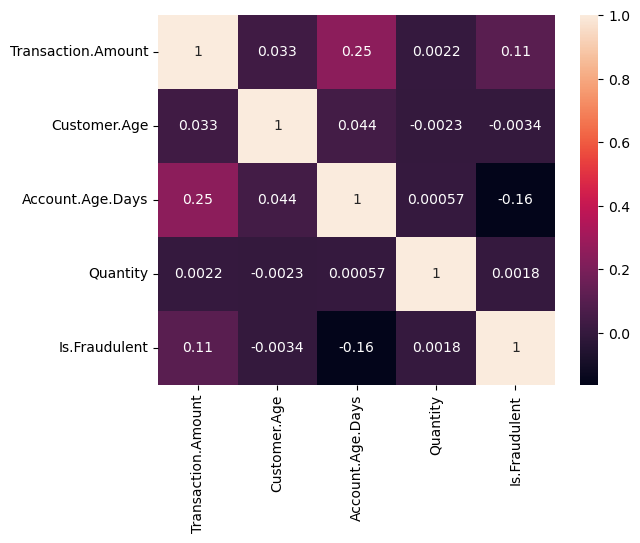

In [17]:
sns.heatmap(df[NUMERIC + ["Is.Fraudulent"]].corr(), annot=True)

wydaje się, że oszustwa częściej dokonywane są na młodszych kontach

<Axes: xlabel='Transaction.Amount', ylabel='Account.Age.Days'>

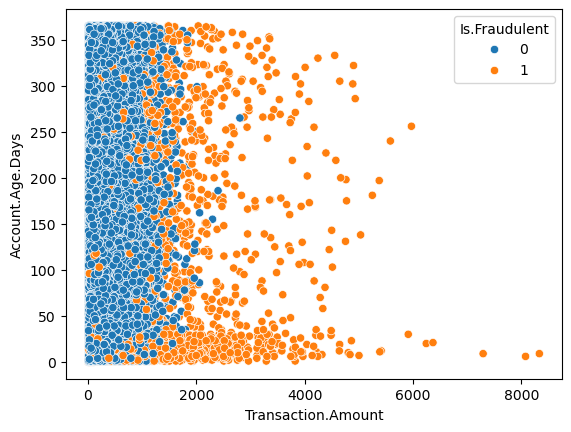

In [ ]:
sns.scatterplot(df, x="Transaction.Amount", y="Account.Age.Days", hue="Is.Fraudulent")

In [4]:
temp=df.groupby(["Is.Fraudulent"])["Account.Age.Days"].mean() #MOST PREDICIVE FEATURE
tempDf = temp.reset_index()
tempDf.columns = ['Is.Fraudulent', 'Account.Age.Days.Mean']
tempDf

,Is.Fraudulent,Account.Age.Days.Mean
0,0,122.416132
1,1,58.690784


średnio konta z których dokonano oszustw są młodsze

C:\Users\Dom\AppData\Local\Temp\ipykernel_3244\408085476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tempDf,y="Account.Age.Days.Mean",x="Is.Fraudulent",palette=colors)


Text(0.5, 1.0, 'Mean Account Age by Fraud Status')

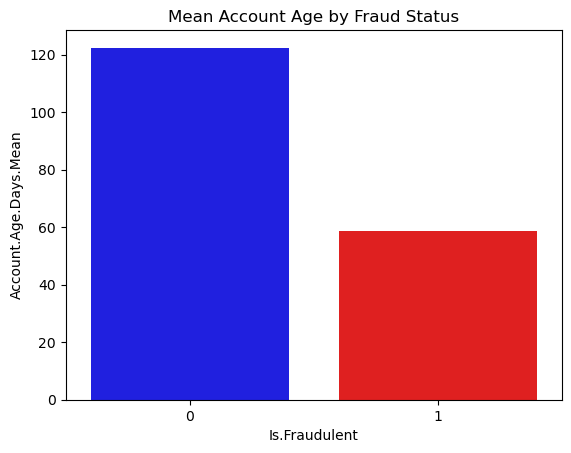

In [5]:
colors=["blue","red"] 
sns.barplot(data=tempDf,y="Account.Age.Days.Mean",x="Is.Fraudulent",palette=colors)
plt.title("Mean Account Age by Fraud Status")

częstość kwot transakcji w podziale na status oszustwa

<Axes: xlabel='Transaction.Amount', ylabel='Count'>

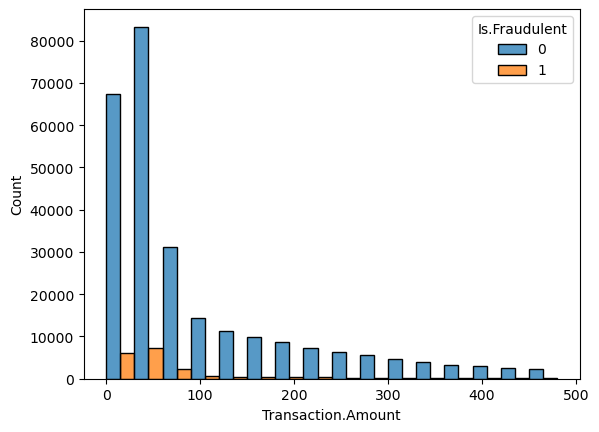

In [29]:
sns.histplot(data=df,x="Transaction.Amount",hue="Is.Fraudulent", multiple="dodge", bins=np.arange(
    0,df["Transaction.Amount"].quantile(0.95),30))

nie wygląda, aby najczęściej (patrzymy na medianę) oszustwa były dokonywane na większe kwoty niż normalne transakcje

/var/folders/lv/tkghl1_16tqcn5rtywgj_bgw0000gn/T/ipykernel_41414/69102667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tempDf,y="Transaction.Amount",x="Is.Fraudulent",palette=colors)


<Axes: xlabel='Is.Fraudulent', ylabel='Transaction.Amount'>

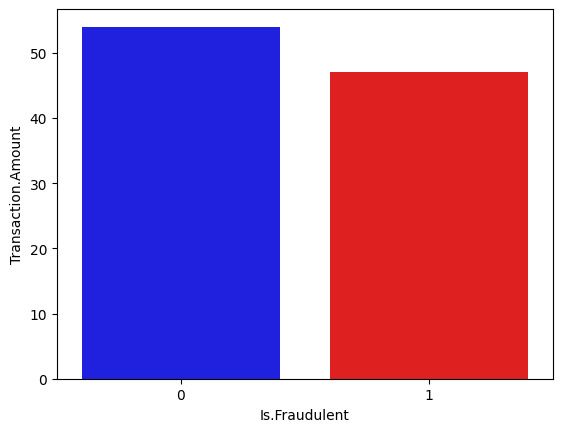

In [39]:
temp=df.groupby(["Is.Fraudulent"])["Transaction.Amount"].median()
tempDf = temp.reset_index()
tempDf.columns = ['Is.Fraudulent', "Transaction.Amount"]
colors=["blue","red"] 
sns.barplot(data=tempDf,y="Transaction.Amount",x="Is.Fraudulent",palette=colors)

<Axes: xlabel='Quantity', ylabel='Count'>

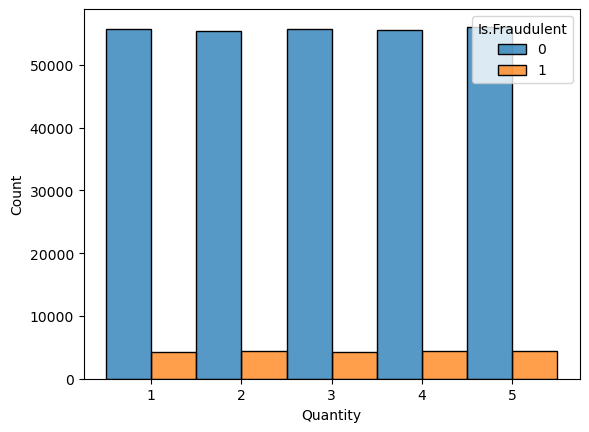

In [51]:
sns.histplot(data=df,x="Quantity",hue="Is.Fraudulent",multiple="dodge", discrete=True) #Nothing fancy

<Axes: xlabel='Customer.Age', ylabel='Count'>

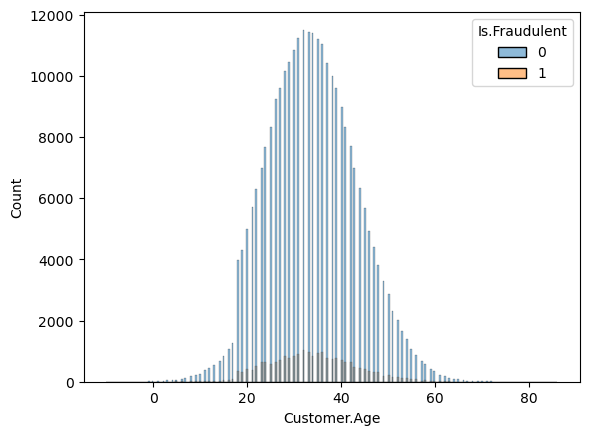

In [6]:
sns.histplot(data=df,x="Customer.Age",hue="Is.Fraudulent") #nothing interesting

macierz czy podany adres był poprawny dla oszustw i nie, nic ciekawego

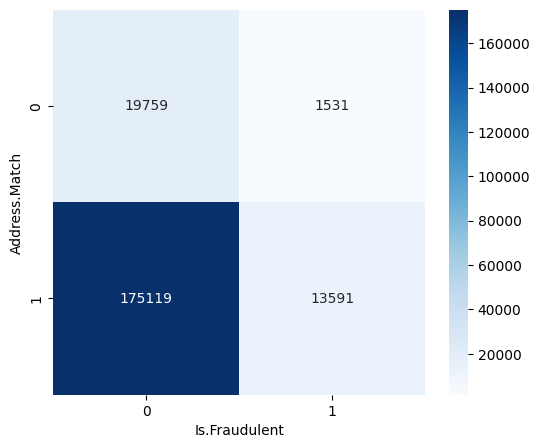

In [22]:
binary_crosstab = pd.crosstab(df["Address.Match"], df["Is.Fraudulent"]) #matching address

plt.figure(figsize=(6, 5))
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt="d")
plt.show()

<Axes: xlabel='Is.Fraudulent', ylabel='Address.Match'>

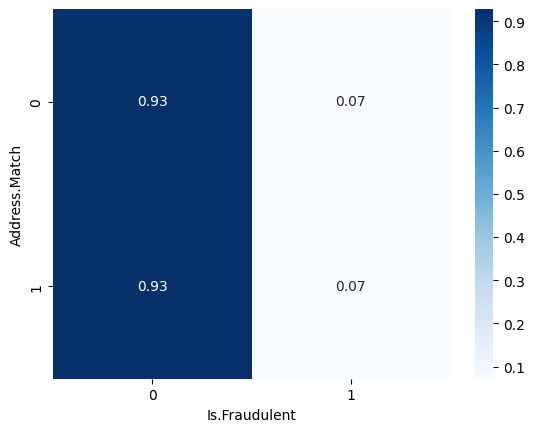

In [23]:
binary_crosstab = pd.crosstab(df["Address.Match"], df["Is.Fraudulent"], normalize="index") #???
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt=".2f")

In [53]:
df.columns

Index(['Transaction.Date', 'Transaction.Amount', 'Customer.Age',
       'Is.Fraudulent', 'Account.Age.Days', 'Transaction.Hour', 'source',
       'browser', 'sex', 'Payment.Method', 'Product.Category', 'Quantity',
       'Device.Used', 'Address.Match'],
      dtype='object')

## Wnioski z analizy istniejących cech
Brak wartości NULL, większość kolumn wydaje się nie mieć wpływu na kolumnę Is.Fraudulent

Wyjątkami są:
* Transaction.Hour - więcej oszustw w godzinach nocnych
* Account.Age.Days - więcej oszustw z młodych kont


---
# WALIDACJA

EDA została dobrze przygotowana. Sprawdzono czy nie ma jakiś brakujących wartości i wykonano wykresy, które pozwoliły zrozumieć jakie dane silnie korelują z kolumną Is.Fraudulent (czyli Transaction.Hour i Account.Age.Days). Wszystko jest dobrze skomentowane więc nie ma aż tak dużego problemu w rozumieniu tego kodu.